In [15]:
import csv
import time
import pandas as pd
import string

from nltk.corpus import stopwords

import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

import re
from collections import Counter
from string import punctuation

from wordcloud import WordCloud 

from textblob import TextBlob

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Analysis of Reddit Posts

In [16]:
df = pd.read_csv('Reddit_data.csv', lineterminator='\n')

df.head()

/Users/chuyuchen/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,created_utc,ups,subreddit_id,link_id,name,score_hidden,author_flair_css_class,author_flair_text,subreddit,id,removal_reason,gilded,downs,archived,author,score,retrieved_on,body,distinguished,edited,controversiality,parent_id
0,1430438400,4,t5_378oi,t3_34di91,t1_cqug90g,0,NaN,NaN,soccer_jp,cqug90g,NaN,0,0,0,rx109,4,1432703079,くそ\n読みたいが買ったら負けな気がする\n図書館に出ねーかな,NaN,0,0,t3_34di91
1,1430438400,4,t5_2qo4s,t3_34g8mx,t1_cqug90h,0,Heat,Heat,nba,cqug90h,NaN,0,0,0,WyaOfWade,4,1432703079,gg this one's over. off to watch the NFL draft I guess,NaN,0,0,t3_34g8mx
2,1430438400,0,t5_2cneq,t3_34f7mc,t1_cqug90i,0,NaN,NaN,politics,cqug90i,NaN,0,0,0,Wicked_Truth,0,1432703079,"Are you really implying we return to those times or anywhere near that political environment? If so, you won't have much luck selling the American people on that governance concept without ushering in American Revolution 2.0.",NaN,0,0,t1_cqufim0
3,1430438400,3,t5_2qh1i,t3_34f9rh,t1_cqug90j,0,NaN,NaN,AskReddit,cqug90j,NaN,0,0,0,jesse9o3,3,1432703079,No one has a European accent either because it doesn't exist. There are accents from Europe but not a European accent.,NaN,0,0,t1_cqug2sr
4,1430438400,3,t5_2qh1i,t3_34fvry,t1_cqug90k,0,NaN,NaN,AskReddit,cqug90k,NaN,0,0,0,beltfedshooter,3,1432703079,"That the kid ""..reminds me of Kevin."" so sad :-(",NaN,0,0,t3_34fvry


In [17]:
df.shape

(28883304, 22)

In [18]:
df = df.drop_duplicates('body')
df.shape

(25622841, 22)

In [19]:
df.head(5)

,created_utc,ups,subreddit_id,link_id,name,score_hidden,author_flair_css_class,author_flair_text,subreddit,id,removal_reason,gilded,downs,archived,author,score,retrieved_on,body,distinguished,edited,controversiality,parent_id
0,1430438400,4,t5_378oi,t3_34di91,t1_cqug90g,0,NaN,NaN,soccer_jp,cqug90g,NaN,0,0,0,rx109,4,1432703079,くそ\n読みたいが買ったら負けな気がする\n図書館に出ねーかな,NaN,0,0,t3_34di91
1,1430438400,4,t5_2qo4s,t3_34g8mx,t1_cqug90h,0,Heat,Heat,nba,cqug90h,NaN,0,0,0,WyaOfWade,4,1432703079,gg this one's over. off to watch the NFL draft I guess,NaN,0,0,t3_34g8mx
2,1430438400,0,t5_2cneq,t3_34f7mc,t1_cqug90i,0,NaN,NaN,politics,cqug90i,NaN,0,0,0,Wicked_Truth,0,1432703079,"Are you really implying we return to those times or anywhere near that political environment? If so, you won't have much luck selling the American people on that governance concept without ushering in American Revolution 2.0.",NaN,0,0,t1_cqufim0
3,1430438400,3,t5_2qh1i,t3_34f9rh,t1_cqug90j,0,NaN,NaN,AskReddit,cqug90j,NaN,0,0,0,jesse9o3,3,1432703079,No one has a European accent either because it doesn't exist. There are accents from Europe but not a European accent.,NaN,0,0,t1_cqug2sr
4,1430438400,3,t5_2qh1i,t3_34fvry,t1_cqug90k,0,NaN,NaN,AskReddit,cqug90k,NaN,0,0,0,beltfedshooter,3,1432703079,"That the kid ""..reminds me of Kevin."" so sad :-(",NaN,0,0,t3_34fvry


In [20]:
df = df.filter(['id','subreddit','created_utc','downs','ups','score','body'], axis=1)
df.head(5)

,id,subreddit,created_utc,downs,ups,score,body
0,cqug90g,soccer_jp,1430438400,0,4,4,くそ\n読みたいが買ったら負けな気がする\n図書館に出ねーかな
1,cqug90h,nba,1430438400,0,4,4,gg this one's over. off to watch the NFL draft I guess
2,cqug90i,politics,1430438400,0,0,0,"Are you really implying we return to those times or anywhere near that political environment? If so, you won't have much luck selling the American people on that governance concept without ushering in American Revolution 2.0."
3,cqug90j,AskReddit,1430438400,0,3,3,No one has a European accent either because it doesn't exist. There are accents from Europe but not a European accent.
4,cqug90k,AskReddit,1430438400,0,3,3,"That the kid ""..reminds me of Kevin."" so sad :-("


In [21]:
top_10_reddit = ['AskReddit', 'leagueoflegends','nba','funny','nfl','pics','videos','news', 'todayilearned','pcmasterrace']

In [22]:
df1 = df[df['subreddit'].isin(top_10_reddit)]
df1.head(5)

,id,subreddit,created_utc,downs,ups,score,body
1,cqug90h,nba,1430438400,0,4,4,gg this one's over. off to watch the NFL draft I guess
3,cqug90j,AskReddit,1430438400,0,3,3,No one has a European accent either because it doesn't exist. There are accents from Europe but not a European accent.
4,cqug90k,AskReddit,1430438400,0,3,3,"That the kid ""..reminds me of Kevin."" so sad :-("
19,cqug90z,AskReddit,1430438400,0,5,5,NSFL
22,cqug912,todayilearned,1430438401,0,0,0,Get back to your pott harry.


In [23]:
df1.shape

(4864688, 7)

In [24]:
df1 = df1.filter(['id','subreddit','created_utc','downs','ups','score','body'], axis=1)
df1.head()

,id,subreddit,created_utc,downs,ups,score,body
1,cqug90h,nba,1430438400,0,4,4,gg this one's over. off to watch the NFL draft I guess
3,cqug90j,AskReddit,1430438400,0,3,3,No one has a European accent either because it doesn't exist. There are accents from Europe but not a European accent.
4,cqug90k,AskReddit,1430438400,0,3,3,"That the kid ""..reminds me of Kevin."" so sad :-("
19,cqug90z,AskReddit,1430438400,0,5,5,NSFL
22,cqug912,todayilearned,1430438401,0,0,0,Get back to your pott harry.


### Data Cleaning

In [35]:
# helper function to clean comments
def processComment(comment):
    # Remove HTML special entities (e.g. &amp;)
    comment = re.sub(r'\&\w*;', '', str(comment))
    #Convert @username to AT_USER
    comment = re.sub('@[^\s]+','', comment)
    # Remove tickers
    comment = re.sub(r'\$\w*', '', comment)
    # To lowercase
    comment = comment.lower()
    # Remove hyperlinks
    comment = re.sub(r'https?:\/\/.*\/\w*', '', comment)
    # Remove hashtags
    comment = re.sub(r'#\w*', '', comment)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    comment = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', comment)
    # Remove words with 2 or fewer letters
    comment = re.sub(r'\b\w{1,2}\b', '', comment)
    # Remove whitespace (including new line characters)
    comment = re.sub(r'\s\s+', ' ', comment)
    # Remove single space remaining at the front of the comment.
    comment = tweet.lstrip('') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    comment = ''.join(c for c in comment if c <= '\uffff') 
    return comment
#

df1['clean_comment'] = df1['body'].apply(processComment)
df1[['body','clean_comment']].head()

,body,clean_comment
1,gg this one's over. off to watch the NFL draft I guess,this one over off watch the nfl draft guess
3,No one has a European accent either because it doesn't exist. There are accents from Europe but not a European accent.,one has european accent either because doesn exist there are accents from europe but not european accent
4,"That the kid ""..reminds me of Kevin."" so sad :-(",that the kid reminds kevin sad
19,NSFL,nsfl
22,Get back to your pott harry.,get back your pott harry


### Sentiment Categorizing

In [36]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

    
df1['category'] = df1['clean_comment'].apply(analyze_sentiment)
df1[['body','clean_comment','category']].head()


,body,clean_comment,category
1,gg this one's over. off to watch the NFL draft I guess,this one over off watch the nfl draft guess,0
3,No one has a European accent either because it doesn't exist. There are accents from Europe but not a European accent.,one has european accent either because doesn exist there are accents from europe but not european accent,0
4,"That the kid ""..reminds me of Kevin."" so sad :-(",that the kid reminds kevin sad,-1
19,NSFL,nsfl,0
22,Get back to your pott harry.,get back your pott harry,0


In [14]:
df1.to_csv('data_cleaned.csv', index=False)

### Visualization of Sentiment

In [28]:
# check the number of positive vs. negative tagged sentences
positives = df1['category'][df1.category == 1]
negatives = df1['category'][df1.category == -1]
neutrals = df1['category'][df1.category == 0]


print('number of positve categorized text is:  {}'.format(len(positives)))
print('number of negative categorized text is: {}'.format(len(negatives)))
print('number of neutral categorized text is: {}'.format(len(neutrals)))
print('total length of the data is:            {}'.format(df1.shape[0]))


number of positve categorized text is:  2083852
number of negative categorized text is: 1174577
number of neutral categorized text is: 1606259
total length of the data is:            4864688


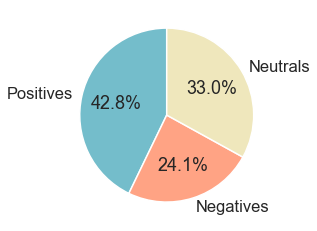

In [33]:
#import matplotlib.pyplot as plt

slices_len = [len(positives), len(negatives), len(neutrals)]
category = ['Positives', 'Negatives', 'Neutrals']
colors = ['#74BDCB', '#FFA384', '#EFE7BC']

plt.pie(slices_len, labels=category, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()
